In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.python.keras import layers
import keras.backend as KTF
from tensorflow.python.keras import Sequential

In [2]:
# 进行配置，使用60%的GPU， 这是为了保护GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction= 0.6
session  = tf.compat.v1.Session(config = config)
# 设置Session
KTF.set_session(session)

In [3]:
print('Num GPUs Available:', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [4]:
tf.test.is_built_with_cuda()
tf.test.is_built_with_gpu_support()
tf.config.list_physical_devices('GPU')

[]

In [5]:
import pathlib
data_dir= "C:\\Users\\natlq\\Downloads\\wavespring"
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

265


In [7]:
print(list(data_dir.glob('*/*.jpg')))

[WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154347.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154726.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154851.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/154939.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155038.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155251.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155342.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155441.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/155933.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160054.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160217.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160412.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160535.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160658.jpg'), WindowsPath('C:/Users/natlq/Downloads/wavespring/OK/160821.jpg'), WindowsPa

In [8]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

IndexError: list index out of range

In [ ]:
PIL.Image.open(str(roses[3]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
PIL.Image.open(str(tulips[1]))

In [8]:
batch_size = 32
img_height = 160
img_width =120

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 220 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['NG', 'OK']


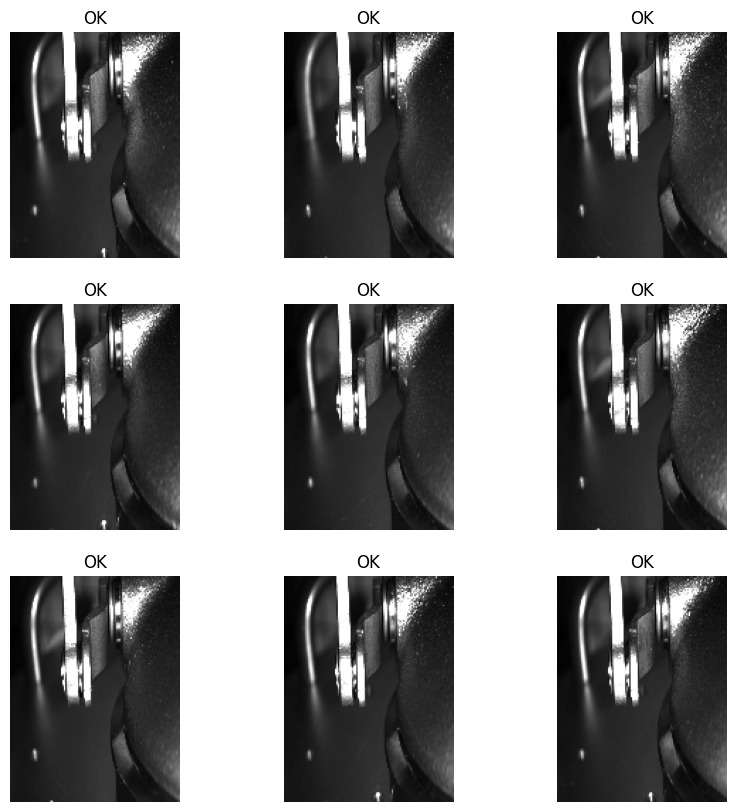

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 160, 120, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 2s 157ms/step - loss: 0.2566 - accuracy: 0.8500 - val_loss: 0.1023 - val_accuracy: 0.9818
Epoch 2/10
7/7 [==============================] - 1s 131ms/step - loss: 0.1704 - accuracy: 0.9591 - val_loss: 0.1331 - val_accuracy: 0.9818
Epoch 3/10
7/7 [==============================] - 1s 140ms/step - loss: 0.1767 - accuracy: 0.9591 - val_loss: 0.0868 - val_accuracy: 0.9818
Epoch 4/10
7/7 [==============================] - 1s 135ms/step - loss: 0.1550 - accuracy: 0.9591 - val_loss: 0.0963 - val_accuracy: 0.9818
Epoch 5/10
7/7 [==============================] - 1s 138ms/step - loss: 0.1403 - accuracy: 0.9591 - val_loss: 0.0700 - val_accuracy: 0.9818
Epoch 6/10
7/7 [==============================] - 1s 128ms/step - loss: 0.1321 - accuracy: 0.9591 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 7/10
7/7 [==============================] - 1s 142ms/step - loss: 0.1071 - accuracy: 0.9591 - val_loss: 0.0474 - val_accuracy: 0.9818
Epoch 8/10
7/7 [====

In [21]:
# model.fit()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 160, 120, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 160, 120, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 15, 64)        0

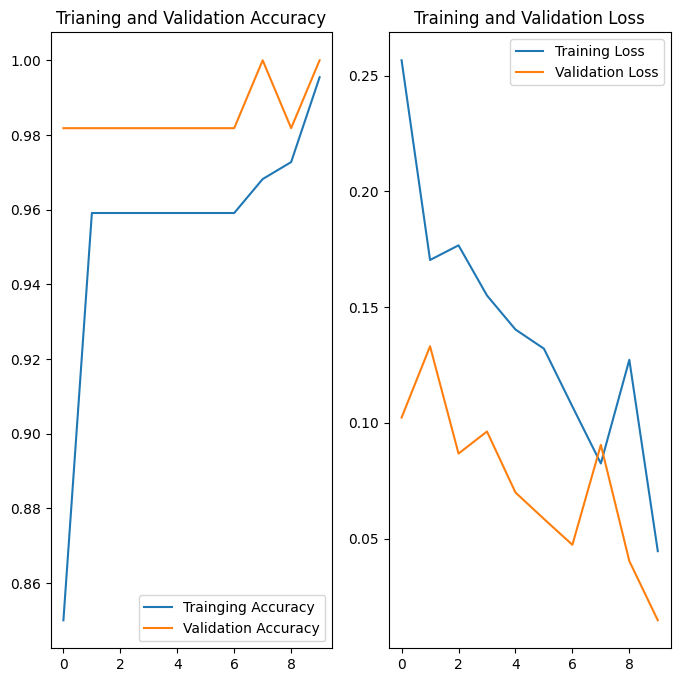

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Trainging Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Trianing and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
data_augmentation = Sequential(
    [
    # tf.keras.layers.RandomFlip("horizontal",
                            #    input_shape=(img_height,
                                            # img_width,
                                            # 3)),
    # tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(height_factor=(-0.7, -0.7))
    # tf.keras.layers.Cropping2D(cropping=((600, 600),(300, 300)))

    ]
)

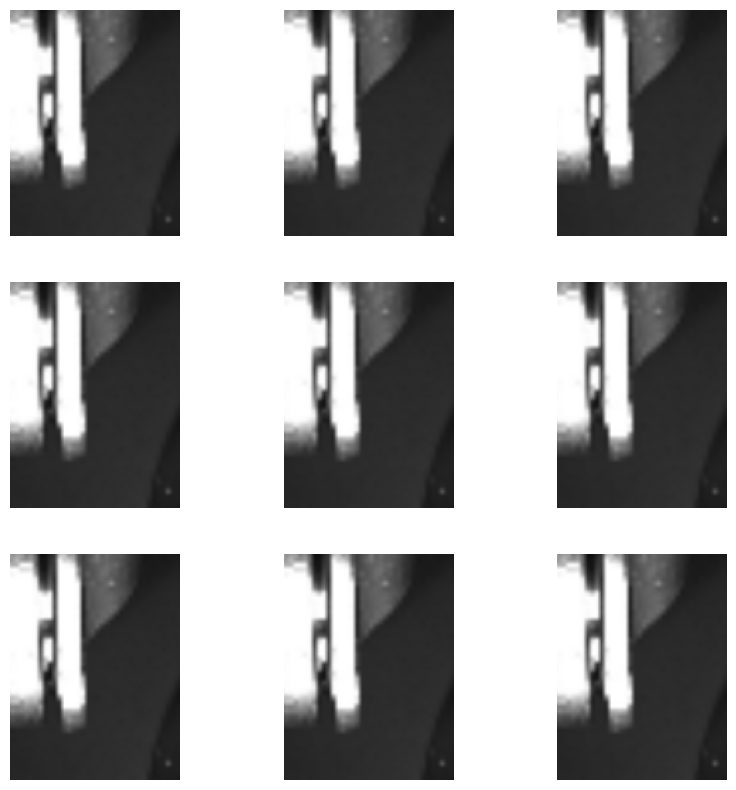

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmentation_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmentation_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [35]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])


In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
epochs = 1 # 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

7/7 [==============================] - 2s 179ms/step - loss: 0.3382 - accuracy: 0.8318 - val_loss: 0.0928 - val_accuracy: 0.9818


In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 160, 120, 3)       0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 160, 120, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 160, 120, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 80, 60, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 30, 64)       

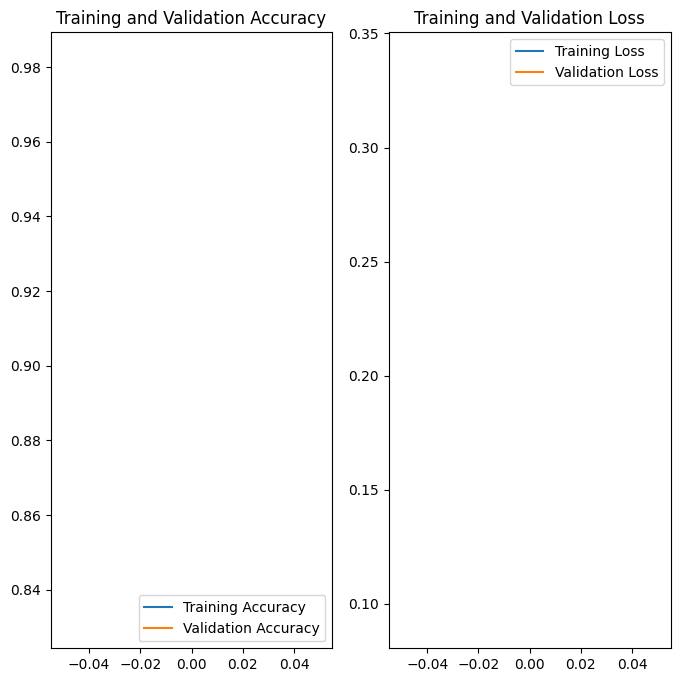

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
sunflower_path = "C:\\Users\\natlq\\Downloads\\predict\\NG\\2342543.png"
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
image_array = np.expand_dims(img_array, axis=0)
print(img_array.size)
print(image_array.size)

predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

print(
    "This iamge most likely belongs to {} with a {:.2f} precent confidence."
    .format(class_names[np.argmax(score)], 100* np.max(score))
)

57600
57600
This iamge most likely belongs to OK with a 98.54 precent confidence.


In [41]:
predict_path_ok = "C:\\Users\\natlq\\Downloads\\predict\\OK"
predict_path_ng = "C:\\Users\\natlq\\Downloads\\predict\\NG"
OK_DIR= pathlib.Path(predict_path_ok)
NG_DIR= pathlib.Path(predict_path_ng)
print(len(list(OK_DIR.glob('*.jpg'))))
for i in range(len(list(OK_DIR.glob('*.jpg')))):
    sunflower_path = list(OK_DIR.glob('*.jpg'))[i]
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
        )
    img_array = tf.keras.utils.img_to_array(img)
    image_array = np.expand_dims(img_array, axis=0)
    print(img_array.size)
    print(image_array.size)
    predictions = model.predict(image_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This iamge most likely belongs to {} with a {:.2f} precent confidence."
        .format(class_names[np.argmax(score)], 100* np.max(score))
        )
print(len(list(NG_DIR.glob('*.jpg'))))
for i in range(len(list(NG_DIR.glob('*.jpg')))):
    sunflower_path = list(NG_DIR.glob('*.jpg'))[i]
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
        )
    img_array = tf.keras.utils.img_to_array(img)
    image_array = np.expand_dims(img_array, axis=0)
    print(img_array.size)
    print(image_array.size)
    predictions = model.predict(image_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This iamge most likely belongs to {} with a {:.2f} precent confidence."
        .format(class_names[np.argmax(score)], 100* np.max(score))
        )


24
57600
57600
This iamge most likely belongs to OK with a 99.87 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.14 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.11 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.15 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.10 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.14 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.09 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.13 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.13 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.11 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.15 precent confidence.
57600
57600
This iamge most likely belongs to OK with a 98.17 precent confidence.
57600
57600
T

In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmp6rtcri9a\assets


INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmp6rtcri9a\assets


In [43]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [44]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_3_input'], 'outputs': ['outputs']}}

In [45]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [47]:
predictions_lite = classify_lite(sequential_1_input = image_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

ValueError: Invalid Input name (sequential_1_input) for SignatureDef

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100* np.max(score_lite))
)

In [ ]:
print(np.max(np.abs(predictions - predictions_lite)))